In [1]:
import os
import pandas as pd
from textblob import *
import nltk
import numpy as np
import openpyxl
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


'''Start with WELFAKE'''

FILENAME = r"../data/Des_fake_news/WELFAKE_PROCESSED.csv"
data = pd.read_csv(FILENAME)
data



,Unnamed: 0.1,Unnamed: 0,title,text,label,text_tb_pol,text_tb_sub,title_tb_pol,title_tb_sub,title_vader_comp,title_vader_neg,title_vader_neu,title_vader_pos,text_vader_neg,text_vader_neu,text_vader_pos
0,35498,35498,Fox News Just Compared Slave Owners To Vict...,Nobody can accuse Fox News of being sane most ...,1,-0.073710,0.456448,-0.333333,0.666667,-0.4588,0.333,0.667,0.000,0.181,0.743,0.077
1,30850,30850,Rescuers search for Philippine storm victims a...,MANILA Reuters Rescuers in the Philippines...,0,0.031739,0.337790,0.000000,0.000000,-0.3182,0.204,0.796,0.000,0.182,0.746,0.072
2,65840,65840,Obama takes on role of America s pitchman at G...,HANOVER Germany Reuters U S President Ba...,0,0.290539,0.514975,0.000000,0.000000,0.0000,0.000,1.000,0.000,0.009,0.904,0.087
3,65424,65424,ISRAEL WILL NAME New Train Station Near Wester...,Israel s transportation minister is pushing ah...,1,0.081429,0.257857,0.078788,0.284848,0.0000,0.000,1.000,0.000,0.024,0.896,0.080
4,21786,21786,Germanys Angela Merkel Makes Incredibly Naive ...,Perhaps Merkel should have considered the seri...,1,0.105782,0.422132,-0.300000,1.000000,-0.3384,0.138,0.862,0.000,0.119,0.764,0.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1247,1247,Terrorist Jon Ritzheimer Uses Sobbing Daughte...,Jon Ritzheimer infamous hater of Muslims and ...,1,0.053139,0.473593,0.000000,0.000000,-0.8074,0.378,0.622,0.000,0.109,0.801,0.090
4996,49972,49972,Bernie Sanders American Dream is in Denmark,Copenhagen Denmark CNN Open a newspaper on ...,0,0.084418,0.440525,0.000000,0.000000,0.2500,0.000,0.750,0.250,0.054,0.835,0.111
4997,1163,1163,Connecticut Becomes First State To Boycott Ind...,WASHINGTON Connecticut Gov Dan Malloy D ...,0,0.071160,0.467252,0.250000,0.333333,-0.3182,0.187,0.813,0.000,0.047,0.902,0.051
4998,15545,15545,Betting on a Trump win or a North Korea H bomb...,NEW YORK WELLINGTON Reuters Erik Duhaime i...,0,0.064652,0.339281,0.800000,0.400000,0.4588,0.143,0.580,0.277,0.043,0.864,0.093


In [2]:
reals = data[data["label"] == 1].reset_index(drop=True)
reals

,Unnamed: 0.1,Unnamed: 0,title,text,label,text_tb_pol,text_tb_sub,title_tb_pol,title_tb_sub,title_vader_comp,title_vader_neg,title_vader_neu,title_vader_pos,text_vader_neg,text_vader_neu,text_vader_pos
0,35498,35498,Fox News Just Compared Slave Owners To Vict...,Nobody can accuse Fox News of being sane most ...,1,-0.073710,0.456448,-0.333333,0.666667,-0.4588,0.333,0.667,0.000,0.181,0.743,0.077
1,65424,65424,ISRAEL WILL NAME New Train Station Near Wester...,Israel s transportation minister is pushing ah...,1,0.081429,0.257857,0.078788,0.284848,0.0000,0.000,1.000,0.000,0.024,0.896,0.080
2,21786,21786,Germanys Angela Merkel Makes Incredibly Naive ...,Perhaps Merkel should have considered the seri...,1,0.105782,0.422132,-0.300000,1.000000,-0.3384,0.138,0.862,0.000,0.119,0.764,0.117
3,16470,16470,OOPS OBAMA Tells Troops No Foreign Terror Att...,In a speech at MacDill Air Force Base in Tamp...,1,-0.009398,0.412473,0.081250,0.262500,-0.8540,0.329,0.596,0.075,0.224,0.716,0.061
4,71923,71923,Hardcore Conservative Republican Senator BLAS...,Donald Trump s decision to end the Deferred Ac...,1,0.156926,0.506169,0.000000,0.000000,-0.6908,0.343,0.657,0.000,0.084,0.784,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,53538,53538,WOW Hillarys VP Pick Tim Kaine Gets Only Peo...,BREAKING TimKaine rally only about people s...,1,-0.120000,0.600000,0.050000,1.000000,0.6739,0.000,0.708,0.292,0.191,0.765,0.044
2567,52129,52129,Charity Is Buying Bankrupt Homophobic Pastors...,In a complete degree turn a church that was ...,1,0.023475,0.507602,0.000000,0.000000,-0.2023,0.207,0.632,0.161,0.062,0.904,0.034
2568,58360,58360,Election The Political Elite Establishment v...,st Century Wire says Is this year s US electio...,1,0.001389,0.265278,0.016667,0.083333,0.5267,0.000,0.673,0.327,0.049,0.879,0.072
2569,6340,6340,PRIORITIES BlackLivesMatter Terrorists Prote...,The December tally in Chicago so far is Dec...,1,0.008861,0.267667,0.400000,0.800000,-0.8979,0.515,0.373,0.112,0.093,0.893,0.013


In [3]:
fakes = data[data["label"] == 0].reset_index(drop=True)
fakes

,Unnamed: 0.1,Unnamed: 0,title,text,label,text_tb_pol,text_tb_sub,title_tb_pol,title_tb_sub,title_vader_comp,title_vader_neg,title_vader_neu,title_vader_pos,text_vader_neg,text_vader_neu,text_vader_pos
0,30850,30850,Rescuers search for Philippine storm victims a...,MANILA Reuters Rescuers in the Philippines...,0,0.031739,0.337790,0.000000,0.000000,-0.3182,0.204,0.796,0.000,0.182,0.746,0.072
1,65840,65840,Obama takes on role of America s pitchman at G...,HANOVER Germany Reuters U S President Ba...,0,0.290539,0.514975,0.000000,0.000000,0.0000,0.000,1.000,0.000,0.009,0.904,0.087
2,70036,70036,Syria Is Calmer but Cautious as Cease Fire Beg...,BEIRUT Lebanon A in the Syrian civil wa...,0,0.057406,0.344828,0.136364,0.454545,-0.4497,0.286,0.608,0.106,0.149,0.724,0.127
3,27613,27613,Fox News poll shows Clinton leading Trump by ...,WASHINGTON Reuters Democrat Hillary Clinto...,0,-0.055556,0.388889,0.000000,0.000000,0.0000,0.000,1.000,0.000,0.000,0.960,0.040
4,30719,30719,Turkish army surveys Syria s Idlib before depl...,AMMAN ANKARA Reuters A Turkish army reconn...,0,0.006845,0.257143,0.000000,0.000000,0.0000,0.000,1.000,0.000,0.099,0.824,0.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,56568,56568,Afghans believe country headed in wrong direct...,KABUL Reuters More than percent of Afghan...,0,0.073176,0.317783,-0.333333,0.533333,0.5719,0.122,0.595,0.283,0.073,0.730,0.197
2425,49972,49972,Bernie Sanders American Dream is in Denmark,Copenhagen Denmark CNN Open a newspaper on ...,0,0.084418,0.440525,0.000000,0.000000,0.2500,0.000,0.750,0.250,0.054,0.835,0.111
2426,1163,1163,Connecticut Becomes First State To Boycott Ind...,WASHINGTON Connecticut Gov Dan Malloy D ...,0,0.071160,0.467252,0.250000,0.333333,-0.3182,0.187,0.813,0.000,0.047,0.902,0.051
2427,15545,15545,Betting on a Trump win or a North Korea H bomb...,NEW YORK WELLINGTON Reuters Erik Duhaime i...,0,0.064652,0.339281,0.800000,0.400000,0.4588,0.143,0.580,0.277,0.043,0.864,0.093


In [4]:
if "LIAR" in FILENAME:
    real_corpus = reals["text"]
else:
    real_corpus = pd.concat((reals["text"], reals["title"]), ignore_index=True, axis=0).reset_index(drop=True)

real_corpus

0       Nobody can accuse Fox News of being sane most ...
1       Israel s transportation minister is pushing ah...
2       Perhaps Merkel should have considered the seri...
3        In a speech at MacDill Air Force Base in Tamp...
4       Donald Trump s decision to end the Deferred Ac...
                              ...                        
5137    WOW  Hillarys VP Pick Tim Kaine Gets Only  Peo...
5138     Charity Is Buying Bankrupt Homophobic Pastors...
5139     Election  The Political Elite Establishment v...
5140    PRIORITIES   BlackLivesMatter Terrorists Prote...
5141     Terrorist Jon Ritzheimer Uses Sobbing Daughte...
Length: 5142, dtype: object

In [5]:
if "LIAR" in FILENAME:
    fake_corpus = fakes["text"]
else:
    fake_corpus = pd.concat((fakes["text"], fakes["title"]), axis=0).reset_index(drop=True)

fake_corpus

0       MANILA  Reuters    Rescuers in the Philippines...
1       HANOVER  Germany  Reuters    U S  President Ba...
2       BEIRUT  Lebanon     A   in the Syrian civil wa...
3       WASHINGTON  Reuters    Democrat Hillary Clinto...
4       AMMAN ANKARA  Reuters    A Turkish army reconn...
                              ...                        
4853    Afghans believe country headed in wrong direct...
4854         Bernie Sanders  American Dream is in Denmark
4855    Connecticut Becomes First State To Boycott Ind...
4856    Betting on a Trump win or a North Korea H bomb...
4857    Files Suggest Honduran Police Leaders Ordered ...
Length: 4858, dtype: object

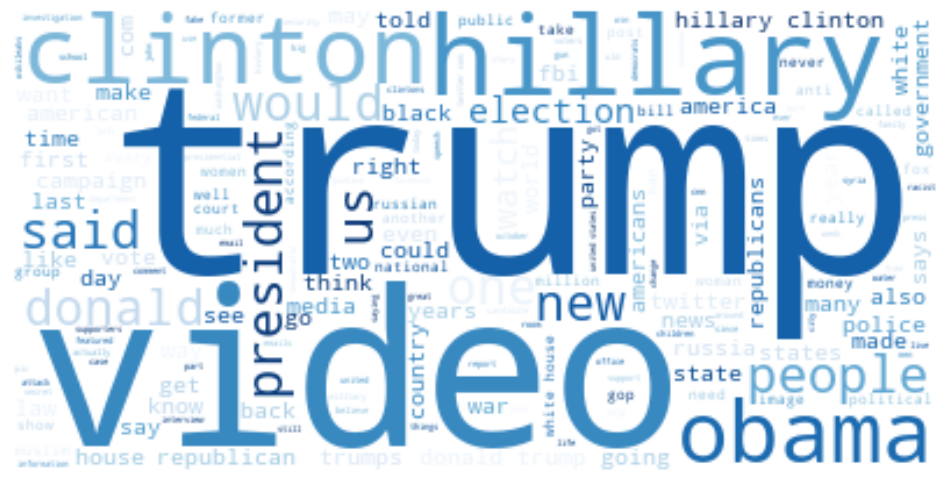

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(strip_accents="ascii", lowercase=True, stop_words=stop_words, max_features=500, ngram_range=(1,3))

words = vectorizer.fit_transform(real_corpus).toarray()
names = vectorizer.get_feature_names_out()
#real_words = real_words.todense().tolist()
df = pd.DataFrame(words, columns=names).sum(axis=0).transpose()

cloud = WordCloud(background_color="white", colormap="Blues").generate_from_frequencies(df)

plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

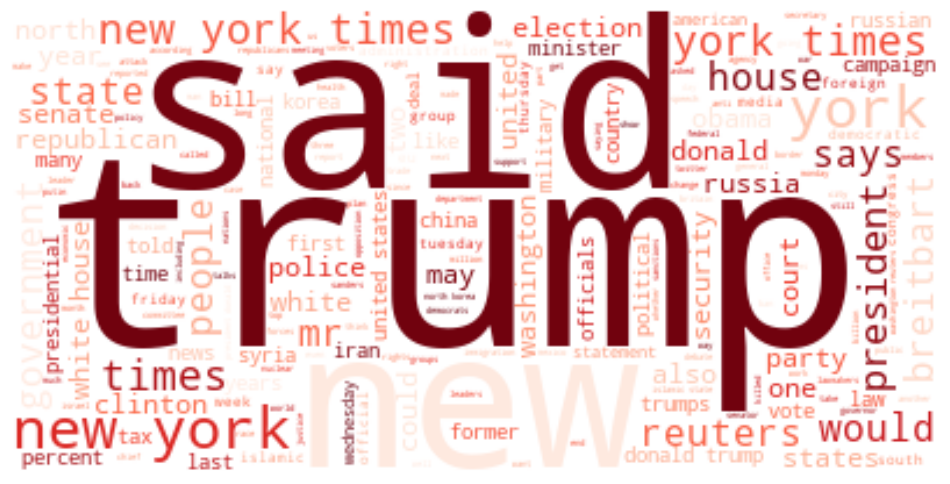

In [9]:
vectorizer = TfidfVectorizer(strip_accents="ascii", lowercase=True, stop_words=stop_words, max_features=500, ngram_range=(1,3))

words = vectorizer.fit_transform(fake_corpus).toarray()
names = vectorizer.get_feature_names_out()
df = pd.DataFrame(words, columns=names).sum(axis=0).transpose()

cloud = WordCloud(background_color="white", colormap="Reds").generate_from_frequencies(df)

plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<AxesSubplot: >

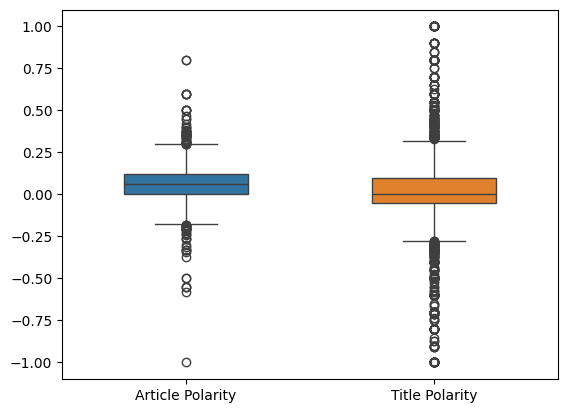

In [34]:
import seaborn as sns

text_blob = reals[["text_tb_pol", "title_tb_pol"]].dropna(axis=0)
text_blob.columns = ["Article Polarity", "Title Polarity"]
sns.boxplot(data=text_blob, width=0.5)


<AxesSubplot: >

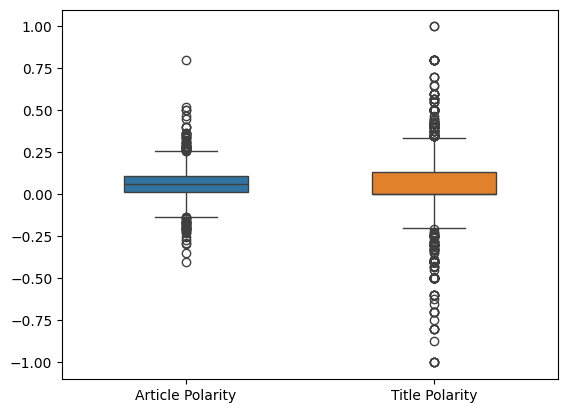

In [35]:
text_blob = fakes[["text_tb_pol", "title_tb_pol"]].dropna(axis=0)
text_blob.columns = ["Article Polarity", "Title Polarity"]
sns.boxplot(data=text_blob, width=0.5)

<AxesSubplot: >

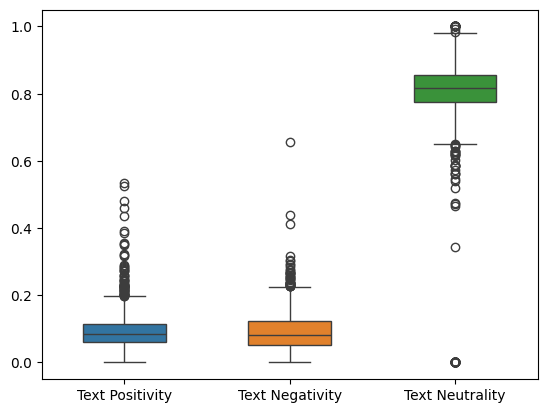

In [43]:
text_blob = reals[["text_vader_pos", "text_vader_neg", "text_vader_neu"]].dropna(axis=0)
text_blob.columns = ["Text Positivity", "Text Negativity", "Text Neutrality"]
sns.boxplot(data=text_blob, width=0.5)

<AxesSubplot: >

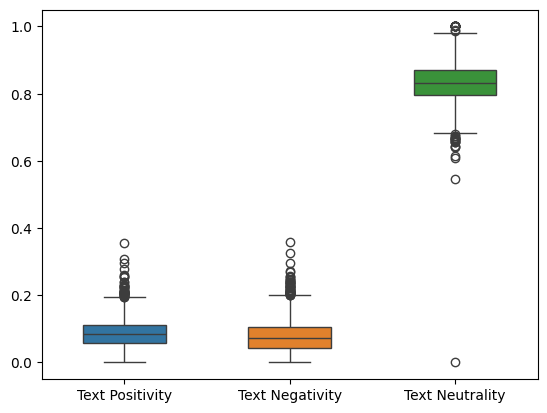

In [44]:
text_blob = fakes[["text_vader_pos", "text_vader_neg", "text_vader_neu"]].dropna(axis=0)
text_blob.columns = ["Text Positivity", "Text Negativity", "Text Neutrality"]
sns.boxplot(data=text_blob, width=0.5)

<AxesSubplot: >

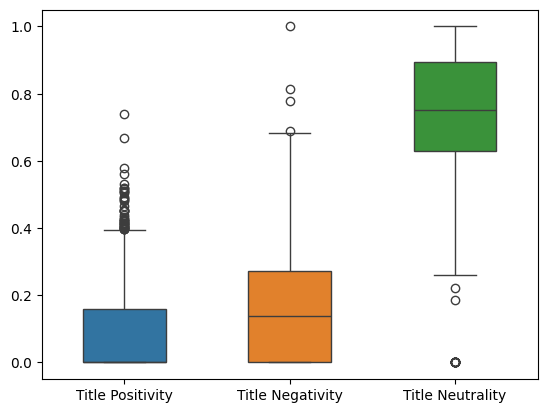

In [47]:
text_blob = reals[["title_vader_pos", "title_vader_neg", "title_vader_neu"]].dropna(axis=0)
text_blob.columns = ["Title Positivity", "Title Negativity", "Title Neutrality"]
sns.boxplot(data=text_blob, width=0.5)

<AxesSubplot: >

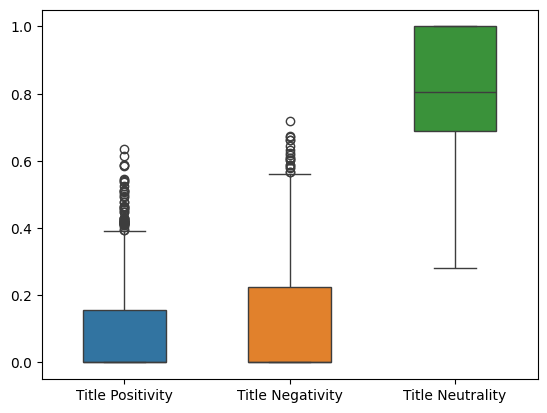

In [48]:
text_blob = fakes[["title_vader_pos", "title_vader_neg", "title_vader_neu"]].dropna(axis=0)
text_blob.columns = ["Title Positivity", "Title Negativity", "Title Neutrality"]
sns.boxplot(data=text_blob, width=0.5)